In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [4]:
df = pd.read_csv('data/MFG10YearTerminationData.csv')
drop_cols = ['EmployeeID', 'recorddate_key', 'birthdate_key', 'orighiredate_key',
             'terminationdate_key', 'gender_full', 'termreason_desc',
             'termtype_desc', 'STATUS_YEAR', 'store_name', 'job_title', 'department_name',
             'city_name']
dummy_cols = ['gender_short', 'BUSINESS_UNIT']
label = df.STATUS

df = df.drop(drop_cols, axis=1)
df = pd.get_dummies(df, columns=dummy_cols)
df = df.drop('STATUS', axis=1)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49653 entries, 0 to 49652
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   age                       49653 non-null  int64
 1   length_of_service         49653 non-null  int64
 2   gender_short_F            49653 non-null  bool 
 3   gender_short_M            49653 non-null  bool 
 4   BUSINESS_UNIT_HEADOFFICE  49653 non-null  bool 
 5   BUSINESS_UNIT_STORES      49653 non-null  bool 
dtypes: bool(4), int64(2)
memory usage: 969.9 KB


In [6]:
df.head()

,age,length_of_service,gender_short_F,gender_short_M,BUSINESS_UNIT_HEADOFFICE,BUSINESS_UNIT_STORES
0,52,17,False,True,True,False
1,53,18,False,True,True,False
2,54,19,False,True,True,False
3,55,20,False,True,True,False
4,56,21,False,True,True,False


In [7]:
df.tail()

,age,length_of_service,gender_short_F,gender_short_M,BUSINESS_UNIT_HEADOFFICE,BUSINESS_UNIT_STORES
49648,21,2,False,True,False,True
49649,19,0,True,False,False,True
49650,21,2,True,False,False,True
49651,19,0,True,False,False,True
49652,20,1,True,False,False,True


In [8]:
df.describe()

,age,length_of_service
count,49653.000000,49653.000000
mean,42.077035,10.434596
std,12.427257,6.325286
min,19.000000,0.000000
25%,31.000000,5.000000
50%,42.000000,10.000000
75%,53.000000,15.000000
max,65.000000,26.000000


In [9]:
X_train, X_test, y_train, y_test = train_test_split(df, label, test_size=0.3,
                                                    random_state=10)

In [10]:
# KNN
KNC = KNeighborsClassifier(n_neighbors=5, weights='uniform')
KNC.fit(X_train, y_train)
kn_score = KNC.score(X_test, y_test)

In [11]:
# SVC
SVC = SVC(C=1, kernel='rbf', random_state=10)
SVC.fit(X_train, y_train)
sv_score = SVC.score(X_test, y_test)

In [12]:
# Random Forest
RFC = RandomForestClassifier(n_estimators=10, criterion='gini', min_samples_split=2,
                               oob_score=False, random_state=10)
RFC.fit(X_train, y_train)
rf_score = RFC.score(X_test, y_test)


In [13]:
print(f'KNN model score is {kn_score:.4f}%')
print(f'SVC model score is {sv_score:.4f}%')
print(f'Random Forest model score is {rf_score:.4f}%')

KNN model score is 0.9859%
SVC model score is 0.9704%
Random Forest model score is 0.9872%


In [14]:
importances = RFC.feature_importances_
top_feature_idx = importances.argmax()
print('Самый значимый признак:', X_train.columns[top_feature_idx], 'Важность:', importances[top_feature_idx])

Самый значимый признак: age Важность: 0.804971248559658


In [15]:
label_map = label.map({'ACTIVE': 0, 'TERMINATED': 1})
ages_active = df['age'][label_map == 0]
ages_terminated = df['age'][label_map == 1]

/var/folders/gw/zqj26f710s38lgx0sn2bknfc0000gn/T/ipykernel_9861/770728604.py:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([ages_active, ages_terminated], labels=['ACTIVE', 'TERMINATED'])


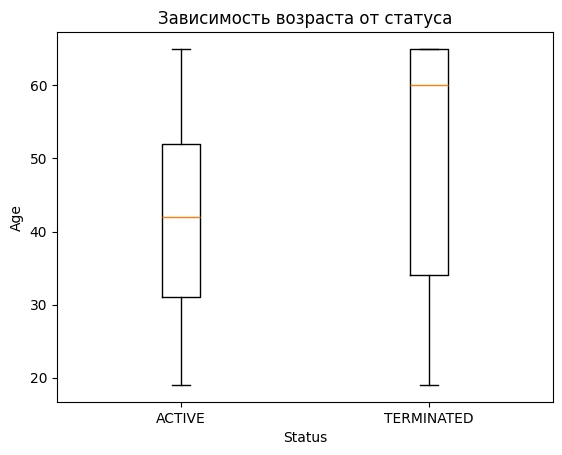

In [16]:
import matplotlib.pyplot as plt

plt.boxplot([ages_active, ages_terminated], labels=['ACTIVE', 'TERMINATED'])
plt.xlabel('Status')
plt.ylabel('Age')
plt.title('Зависимость возраста от статуса')
plt.suptitle('')
plt.show()
